<a href="https://colab.research.google.com/github/GerardoMunoz/Vision/blob/main/image_manipulation/Class1_OpenCV_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 Class 1: Introduction to OpenCV

**Course:** Big Data & Deep Learning  
**Module:** Convolutional Neural Networks  
**Class 1 Objective:** Learn the basics of OpenCV and image preprocessing for CNNs.

---

## 🔍 What is OpenCV?

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and image processing library.  
It allows us to perform operations such as reading, transforming, and analyzing images and videos efficiently.

In this class, we will cover:
- Reading and displaying images
- Performing basic transformations (resize, crop, rotate)
- Detecting edges, colors, and contours
- Preparing data for CNNs

---


In [6]:

# 🧰 Install dependencies (Colab environment)
!pip install opencv-python matplotlib numpy --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)


OpenCV version: 4.12.0



## 🖼️ 1. Reading and Displaying Images

OpenCV uses `cv2.imread()` to read images.  
Images are read in **BGR** format (Blue-Green-Red), not RGB.

Let's load an example image from the web.


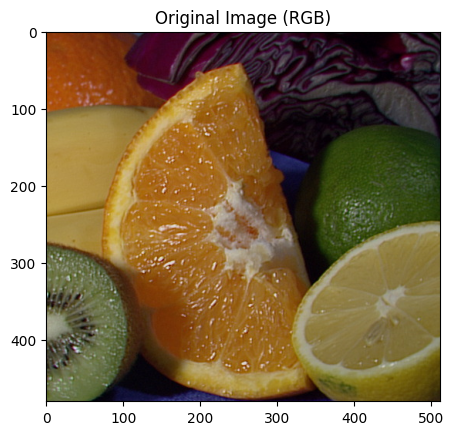

In [20]:

# Example image URL
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg"

# Read the image from URL
import urllib.request
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
#plt.axis("off")
plt.show()



### 🧩 Exercise 1
Load a different image from the internet (any URL you like) and display it using `matplotlib`.

💡 *Hint:* Use the same `urllib.request` method as above.


In [8]:
# Your code here 👇



## 🎨 2. Converting and Saving Images

We can easily convert images to grayscale, HSV, or other formats using `cv2.cvtColor()`.


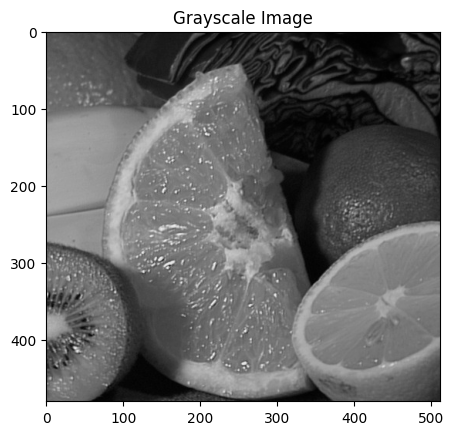

True

In [21]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
#plt.axis("off")
plt.show()

# Save it
cv2.imwrite("grayscale_image.jpg", gray)



### 🧩 Exercise 2
Convert your image to HSV and display each channel separately (Hue, Saturation, Value).


In [10]:
# Your code here 👇



## 🔄 3. Image Transformations

We can resize, crop, rotate, and apply filters to images.

### 🔹 Resizing


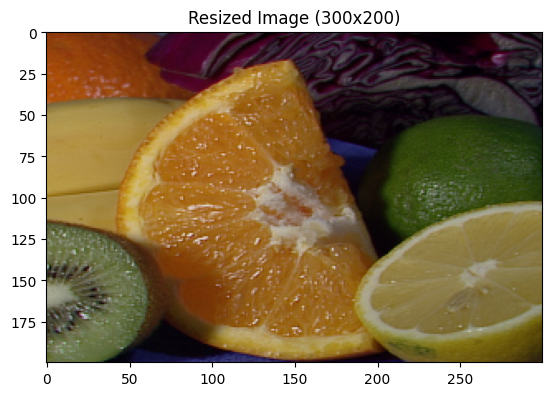

In [22]:

resized = cv2.resize(img_rgb, (300, 200))
plt.imshow(resized)
plt.title("Resized Image (300x200)")
#plt.axis("off")
plt.show()



### 🔹 Cropping
Cropping is done using NumPy slicing.


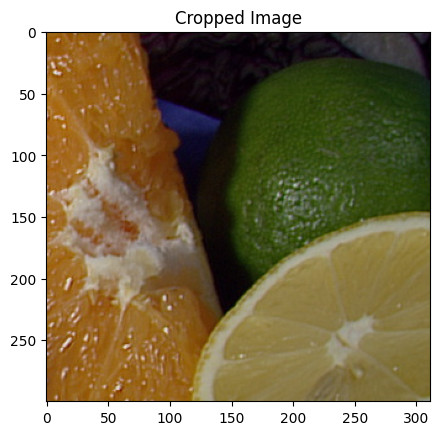

In [23]:

cropped = img_rgb[100:400, 200:600]
plt.imshow(cropped)
plt.title("Cropped Image")
#plt.axis("off")
plt.show()



### 🔹 Filtering and Edge Detection

We often use filters to remove noise or detect edges before training CNNs.


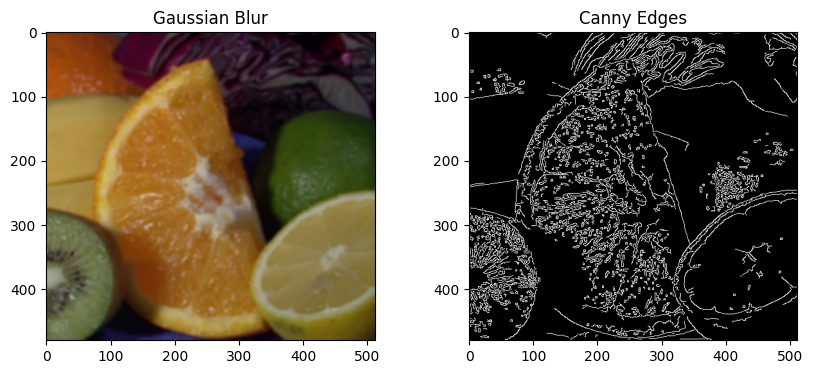

In [24]:

blurred = cv2.GaussianBlur(img_rgb, (11, 11), 0)
edges = cv2.Canny(img_rgb, 100, 200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("Gaussian Blur")
#plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
#plt.axis("off")
plt.show()



### 🧩 Exercise 3
Try different values for the Canny thresholds or blur kernel sizes.  
Observe how the results change.


In [14]:
# Your code here 👇



## 🎯 4. Color and Shape Detection

Now let's detect specific colors in an image using the **HSV color space** (Hue, Saturation, Value).


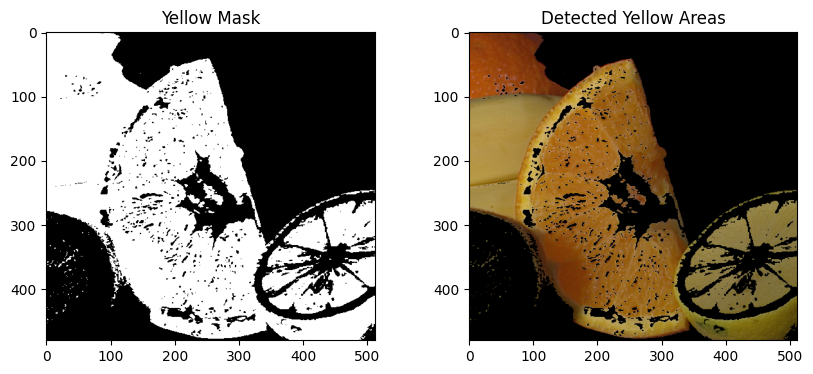

In [38]:

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define Yellow color range in HSV
lower_yellow = np.array([0, 120, 70])
upper_yellow = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
yellow_detected = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title("Yellow Mask")
#plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(yellow_detected)
plt.title("Detected Yellow Areas")
#plt.axis("off")
plt.show()



### 🧩 Exercise 4
Modify the HSV ranges to detect **green** or **blue** objects instead of red.


In [16]:
# Your code here 👇



## 🟦 5. Contour Detection

Contours help us identify and count objects in images.


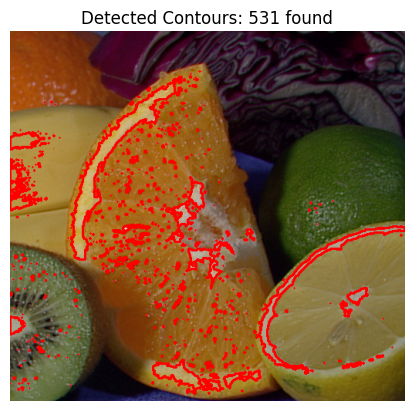

In [17]:

# Convert to grayscale and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_img = img_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 2)

plt.imshow(contour_img)
plt.title(f"Detected Contours: {len(contours)} found")
plt.axis("off")
plt.show()



### 🧩 Exercise 5
Try changing the threshold value and observe how the contour detection changes.


In [18]:
# Your code here 👇



## 🧠 6. Connection to Convolutional Neural Networks (CNNs)

Before feeding images to a CNN, we usually:
1. Resize all images to a fixed dimension (e.g., 224x224).  
2. Normalize pixel values (divide by 255).  
3. Augment data (rotate, flip, crop).

OpenCV is a powerful tool for all these preprocessing tasks.



### 🧩 Final Challenge
Write a function `preprocess_image(image_url)` that:
1. Reads an image from a URL  
2. Resizes it to 224x224  
3. Converts it to grayscale  
4. Normalizes the pixel values (0 to 1)  
5. Returns the processed image

Then, display the result.


In [19]:
# Your code here 👇
